In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [5]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [7]:
boston  = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [8]:
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [9]:
boston['MEDV'] = boston_dataset.target

In [10]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

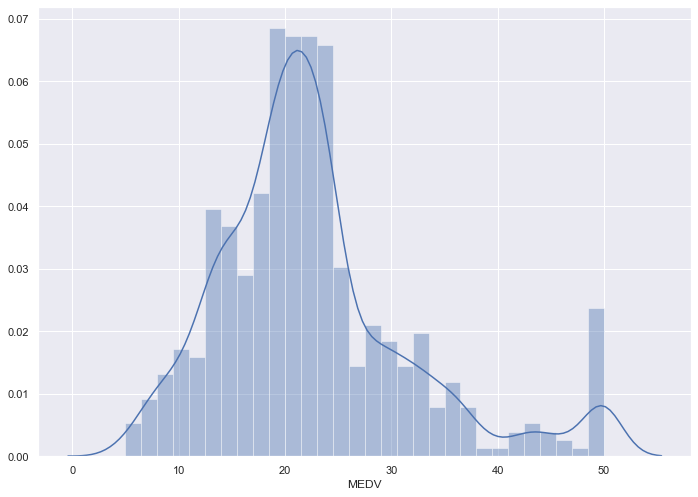

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'],bins=30)

In [14]:
correlation_matrix = boston.corr().round(2)

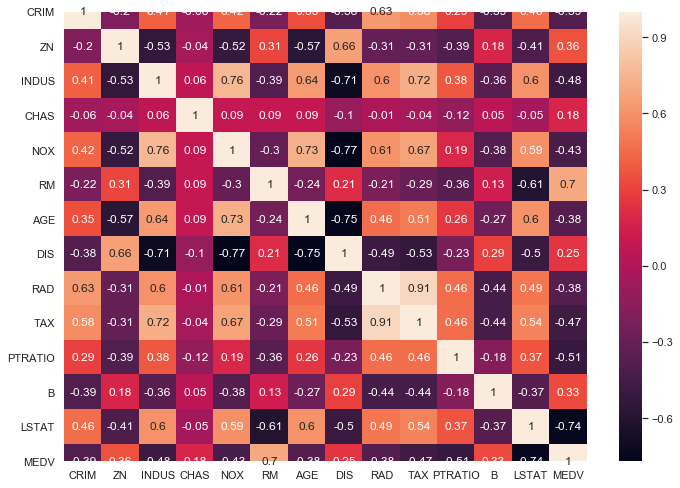

In [15]:
sns.heatmap(data=correlation_matrix,annot=True)

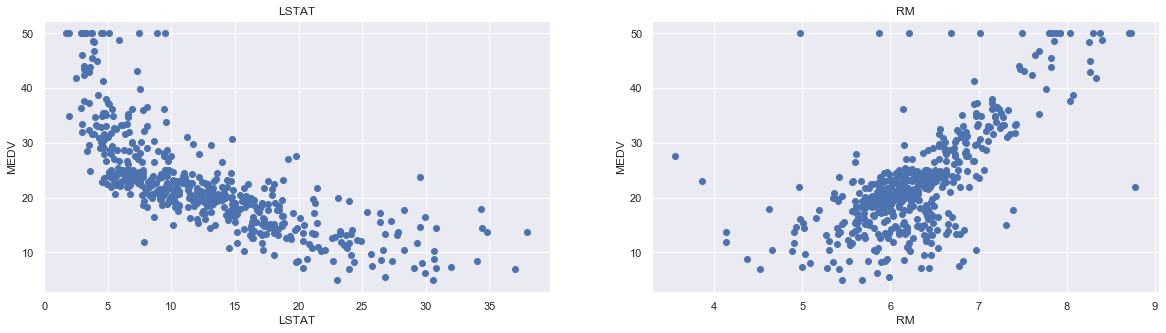

In [16]:
plt.figure(figsize=(20,5))
features = ['LSTAT','RM']
target = boston['MEDV']

for i , col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x = boston[col]
    y = target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [21]:
X = pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns= ['LSTAT','RM'])
y = boston['MEDV']

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)

(404, 2)
(102, 2)
33     13.1
283    50.0
418     8.8
502    20.6
402    12.1
       ... 
486    19.1
189    34.9
495    23.1
206    24.4
355    20.6
Name: MEDV, Length: 404, dtype: float64
226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
       ... 
349    26.6
212    22.4
156    13.1
480    23.0
248    24.5
Name: MEDV, Length: 102, dtype: float64


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
lin_model = LinearRegression()

In [29]:
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_train_prediction = lin_model.predict(X_train)

In [33]:
rmse = (np.sqrt(mean_squared_error(y_train,y_train_prediction)))

In [34]:
rmse

5.6371293350711955

In [37]:
y_test_predict = lin_model.predict(X_test)

In [40]:
rmse_1 = (np.sqrt(mean_squared_error(y_test,y_test_predict)))

In [41]:
rmse_1

5.13740078470291